In [24]:
import numpy as np
np.random.seed(10)
def clamp(num, min_value, max_value):
   return max(min(num, max_value), min_value)

def k(u,v):
  return (np.pi - np.arccos(clamp(u.T@v,-1,1)))/(2*np.pi)
def kk(u,v):
  return ((1/(2*np.pi))/(np.sqrt(1-clamp((u.T@v),-1+1e-10, 1-1e-10)**2)))*v

def step(d,m,lr,niter, orthogonal_case = 0):
  if (orthogonal_case==0):
    U=np.random.randn(d,m)
    U = U / np.linalg.norm(U, ord=2, axis=0, keepdims=True)
    V=np.random.randn(d,m)
    V = V / np.linalg.norm(V, ord=2, axis=0, keepdims=True)
  else:
    U=np.eye(d,m)
    V=np.eye(d,m,-m)
  Vs = []
  obj = np.zeros((niter))
  grad = np.zeros((d,m))
  for t in range(niter):
    Vs.append(V)
    obj[t] = sum([k(U[:,i], U[:,j])/2 + k(V[:,i], V[:,j])/2 - k(U[:,i], V[:,j]) for i in range(m) for j in range(m)])
    """
    for i in range(m):
      for j in range(m):
        obj[t] = obj[t] + k(U[:,i], U[:,j])/2 + k(V[:,i], V[:,j])/2 - k(U[:,i], V[:,j])

    for i in range(m):
      for j in range(m):
        if (i != j):
          grad[:,i] += kk(V[:,i], V[:,j]) 
        grad[:,i] -= kk(V[:,i], U[:,j])
    """
    for i in range(m):
      grad[:,i] = sum([kk(V[:,i], V[:,j]) for j in range(m) if j!=i]) - sum([kk(V[:,i], U[:,j]) for j in range(m)])

    V = V-lr*grad
    V = V / np.linalg.norm(V, ord=2, axis=0, keepdims=True)
  return obj, Vs, U


In [65]:
d = 15
m = 5
lr = 1.0
niter = 20000
obj, Vs, U = step(d, m, lr, niter, 0)

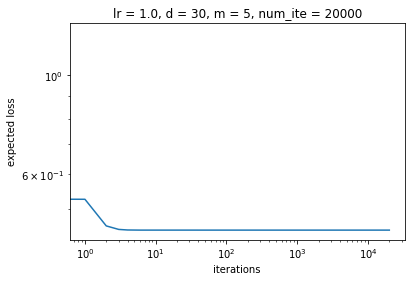

In [61]:
import matplotlib.pyplot as plt 
plt.title(f"lr = {lr}, d = {d}, m = {m}, num_ite = {niter}")
plt.yscale('log')
plt.xscale('log')
plt.ylabel("expected loss")
plt.xlabel("iterations")
plt.plot(obj)

In [66]:
obj[-1]

0.17756975228284477

In [39]:
Vs[-1]

array([[ 0.246966  , -0.24696813,  0.35082168],
       [-0.36075758,  0.36075292, -0.16450754],
       [-0.19106919,  0.1910678 , -0.11266519],
       [-0.43436104,  0.43436024,  0.14324856],
       [-0.26418303,  0.26418495,  0.09782781],
       [-0.04139579,  0.04140093,  0.19288616],
       [ 0.36086967, -0.36087619,  0.61695364],
       [-0.60929556,  0.60929421, -0.0692375 ],
       [-0.07464655,  0.07463783, -0.0151848 ],
       [-0.07168281,  0.07168516, -0.61985181]])

In [38]:
U

array([[-0.06679795, -0.13268078,  0.35082277],
       [-0.20075727, -0.02145253, -0.16450351],
       [ 0.3009828 , -0.37513312, -0.11266357],
       [-0.0350718 ,  0.0844529 ,  0.14324713],
       [-0.06208192,  0.2615574 ,  0.09782446],
       [ 0.70993375, -0.39887134,  0.19288068],
       [-0.30068063, -0.21103117,  0.61695787],
       [ 0.50197634, -0.49086298, -0.06923735],
       [-0.01894417, -0.56372522, -0.01517636],
       [ 0.11316276,  0.05745515, -0.61985113]])

In [28]:
np.eye(d,m,-m)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])